In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load CSV into a DataFrame
df = pd.read_csv(r'C:\Users\JTeno\Desktop\Sports Analytics\2023-2025 rOBA vs Runs.csv')

In [4]:
df

,Tm,Year,rOBA,Runs Scored
0,Arizona Diamondbacks,2025,0.334,791
1,Athletics,2025,0.327,733
2,Atlanta Braves,2025,0.321,724
3,Baltimore Orioles,2025,0.309,677
4,Boston Red Sox,2025,0.329,786
...,...,...,...,...
85,St. Louis Cardinals,2023,0.328,719
86,Tampa Bay Rays,2023,0.342,860
87,Texas Rangers,2023,0.345,881
88,Toronto Blue Jays,2023,0.329,746


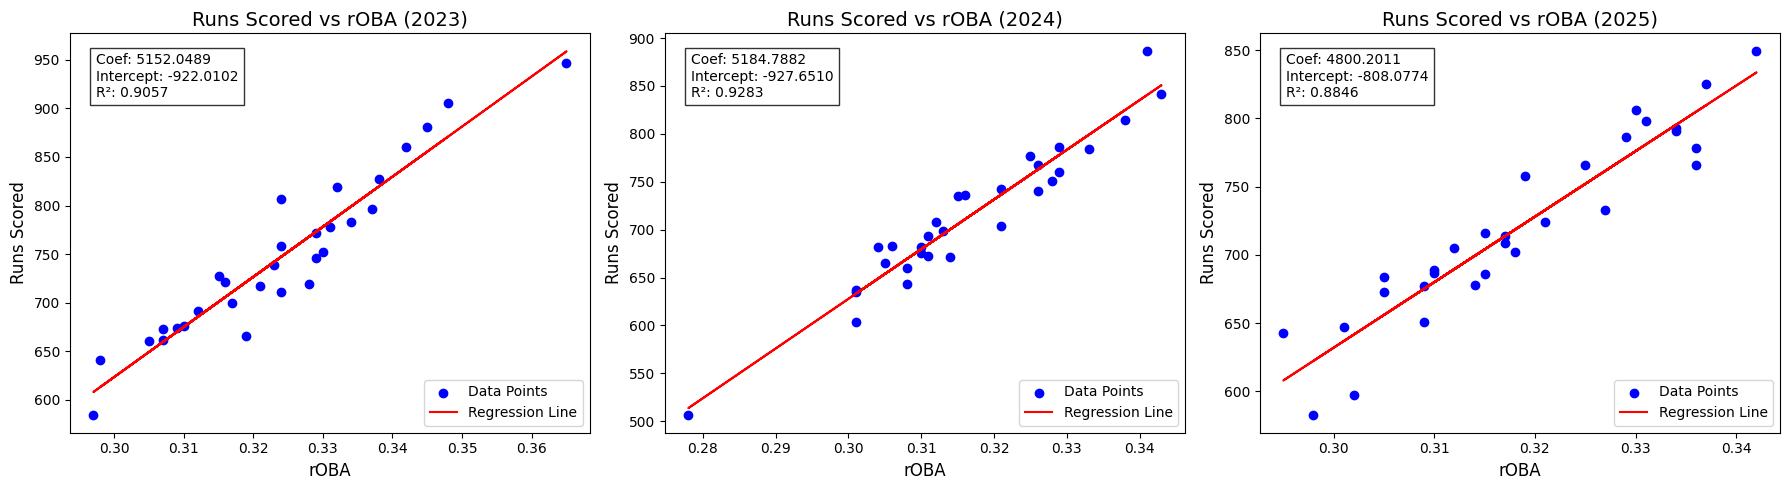

In [6]:
# Import Required Libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Get unique years from the DataFrame
years = df['Year'].unique()

# Create subplots for each year
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Generate regression plots for each year
for i, year in enumerate(sorted(years)):
    ax = axes[i]
    
    # Filter data by year
    df_year = df[df['Year'] == year]
    
    # Independent and dependent variables (switched)
    X = df_year[['rOBA']]
    y = df_year['Runs Scored']
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Scatterplot and regression line
    ax.scatter(X, y, color='blue', label='Data Points')
    ax.plot(X, y_pred, color='red', label='Regression Line')
    ax.set_title(f"Runs Scored vs rOBA ({year})", fontsize=14)
    ax.set_xlabel('rOBA', fontsize=12)
    ax.set_ylabel('Runs Scored', fontsize=12)
    ax.legend()
    
    # Display regression stats on the plot
    ax.text(0.05, 0.95, f"Coef: {model.coef_[0]:.4f}\nIntercept: {model.intercept_:.4f}\nR²: {r2:.4f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout()
plt.show()